# Selection of rules

We will use the same data as within the 'predefined TFBS' notebook:

In [1]:
import tfcomb.objects
C = tfcomb.objects.CombObj().from_pickle("../data/GM12878.pkl")

In [2]:
C

<CombObj: 205199 TFBS (118 unique names) | Market basket analysis: 6588 rules>

----------

## Select rules using measure/p-value

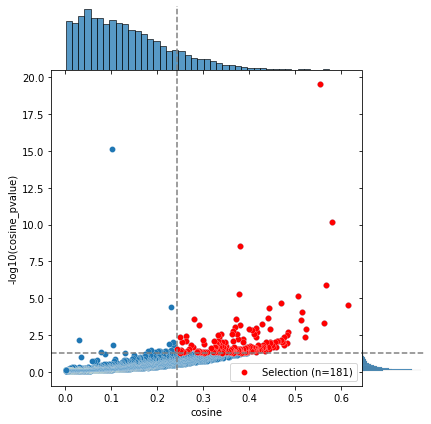

In [3]:
selected = C.select_significant_rules()

In [4]:
selected

<CombObj: 180985 TFBS (118 unique names) | Market basket analysis: 181 rules>

In [5]:
selected.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,n_baskets,TF1_TF2_support,TF1_support,TF2_support,cosine,cosine_pvalue,cosine_pvalue_adj
BATF-JUNB,BATF,JUNB,1951,3295,3060,205199,0.009508,0.016058,0.014912,0.614425,2.734407e-05,3.602855e-01
CTCF-ZNF143,CTCF,ZNF143,2607,4845,4166,205199,0.012705,0.023611,0.020302,0.580276,7.004289e-11,9.228851e-07
HCFC1-SIX5,HCFC1,SIX5,401,948,528,205199,0.001954,0.004620,0.002573,0.566791,1.334777e-06,1.758702e-02
CREB1-CREM,CREB1,CREM,1583,2598,3045,205199,0.007714,0.012661,0.014839,0.562818,5.134316e-04,1.000000e+00
USF1-USF2,USF1,USF2,413,748,743,205199,0.002013,0.003645,0.003621,0.553994,2.792982e-20,3.680033e-16
...,...,...,...,...,...,...,...,...,...,...,...,...
SMARCA5-ZNF143,SMARCA5,ZNF143,837,2655,4166,205199,0.004079,0.012939,0.020302,0.251671,3.401820e-02,1.000000e+00
USF1-MAX,USF1,MAX,296,748,1874,205199,0.001443,0.003645,0.009133,0.250009,4.954137e-02,1.000000e+00
NFYB-RFX5,NFYB,RFX5,227,1375,601,205199,0.001106,0.006701,0.002929,0.249711,4.236595e-03,1.000000e+00
RFX5-ELK1,RFX5,ELK1,168,601,759,205199,0.000819,0.002929,0.003699,0.248743,3.939496e-02,1.000000e+00


In [6]:
selected.to_pickle("../data/GM12878_selected.pkl")

------------

## Select top rules

In [7]:
C.select_top_rules(n=100)

<CombObj: 131253 TFBS (118 unique names) | Market basket analysis: 100 rules>

--------------

## Select rules based on a list of TF names

In [8]:
TF_list = ["ELK1", "CTCF", "ZNF143", "YY1"]

In [9]:
selected3 = C.select_TF_rules(TF_list)

In [10]:
selected3

<CombObj: 13353 TFBS (118 unique names) | Market basket analysis: 6 rules>

In [11]:
selected3.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,n_baskets,TF1_TF2_support,TF1_support,TF2_support,cosine,cosine_pvalue,cosine_pvalue_adj
CTCF-ZNF143,CTCF,ZNF143,2607,4845,4166,205199,0.012705,0.023611,0.020302,0.580276,7.004289e-11,9.228851e-07
YY1-ZNF143,YY1,ZNF143,1704,3583,4166,205199,0.008304,0.017461,0.020302,0.441049,2.258042e-04,1.000000e+00
CTCF-YY1,CTCF,YY1,1385,4845,3583,205199,0.006750,0.023611,0.017461,0.332414,8.605782e-03,1.000000e+00
YY1-ELK1,YY1,ELK1,340,3583,759,205199,0.001657,0.017461,0.003699,0.206174,2.536144e-01,1.000000e+00
ELK1-ZNF143,ELK1,ZNF143,331,759,4166,205199,0.001613,0.003699,0.020302,0.186143,2.640406e-01,1.000000e+00
ELK1-CTCF,ELK1,CTCF,122,759,4845,205199,0.000595,0.003699,0.023611,0.063620,6.728012e-01,1.000000e+00


It is also possible to specify that the rules should only be selected from matches to TF1 (by setting TF2=False):

In [12]:
selected3 = C.select_TF_rules(TF_list, TF2=False)

In [13]:
selected3.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,n_baskets,TF1_TF2_support,TF1_support,TF2_support,cosine,cosine_pvalue,cosine_pvalue_adj
CTCF-ZNF143,CTCF,ZNF143,2607,4845,4166,205199,0.012705,0.023611,0.020302,0.580276,7.004289e-11,9.228851e-07
CTCF-TRIM22,CTCF,TRIM22,2015,4845,3809,205199,0.009820,0.023611,0.018562,0.469054,2.040193e-05,2.688158e-01
YY1-ZNF143,YY1,ZNF143,1704,3583,4166,205199,0.008304,0.017461,0.020302,0.441049,2.258042e-04,1.000000e+00
CTCF-YY1,CTCF,YY1,1385,4845,3583,205199,0.006750,0.023611,0.017461,0.332414,8.605782e-03,1.000000e+00
YY1-POU2F2,YY1,POU2F2,1028,3583,2676,205199,0.005010,0.017461,0.013041,0.331991,4.822963e-02,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
YY1-KDM1A,YY1,KDM1A,3,3583,45,205199,0.000015,0.017461,0.000219,0.007471,7.881009e-01,1.000000e+00
CTCF-SUZ12,CTCF,SUZ12,10,4845,411,205199,0.000049,0.023611,0.002003,0.007087,6.686401e-01,1.000000e+00
CTCF-NFYA,CTCF,NFYA,5,4845,121,205199,0.000024,0.023611,0.000590,0.006530,7.595455e-01,1.000000e+00
CTCF-PAX8,CTCF,PAX8,9,4845,394,205199,0.000044,0.023611,0.001920,0.006514,8.069781e-01,1.000000e+00
